## **1- Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import os
from tensorflow.keras.models import *
from keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing import image


2024-02-07 17:31:47.877075: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 17:31:47.877139: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 17:31:47.878724: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## **2- read dataset**

In [2]:
# read images
train_path = "/kaggle/input/continual-learning-of-covid19/COVID_CTandXRAY_11_dataset_5011_CL_Benchmark/train"
test_path = "/kaggle/input/continual-learning-of-covid19/COVID_CTandXRAY_11_dataset_5011_CL_Benchmark/test"

image_category = os.listdir("/kaggle/input/continual-learning-of-covid19/COVID_CTandXRAY_11_dataset_5011_CL_Benchmark/train")

## **Visualizing images**

In [3]:
#plotting images 
def plot_images(image_category):
    
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(image_category):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img) / 255
        
        plt.subplot(3,4, i+1)
        plt.imshow(img_arr)
        plt.title(category)
        plt.axis('off')
        
    plt.show()   

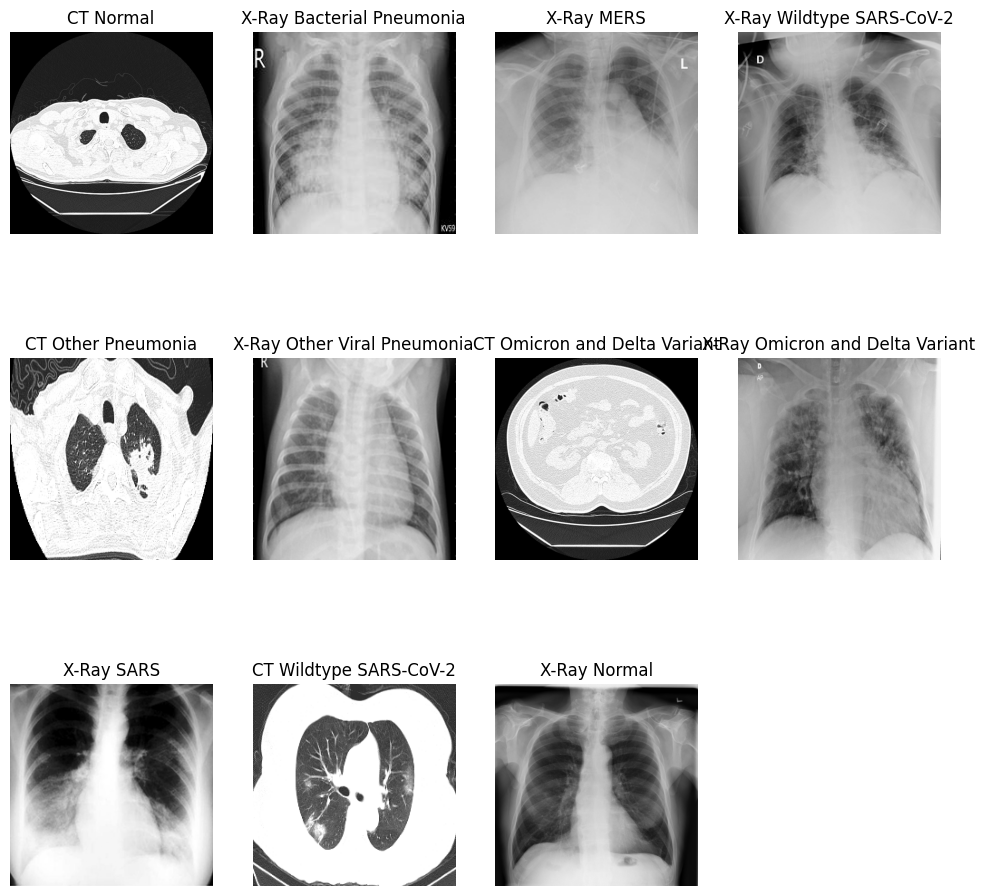

In [4]:
plot_images(image_category)

## **4- data augmentation**

In [5]:
# data augmentation
data_aug = ImageDataGenerator(rescale = 1.0/255.0)

In [6]:
#1- train data
train_data = data_aug.flow_from_directory(
                                                train_path,
                                                target_size = (512,512),
                                                batch_size = 10,
                                                )

Found 3939 images belonging to 11 classes.


In [7]:
#2- test data
test_data = data_aug.flow_from_directory(
                                                test_path,
                                                target_size = (512,512),
                                                batch_size = 10,
                                                )

Found 1072 images belonging to 11 classes.


## **5- model building**

In [8]:
#model building
cnn_model = Sequential()

#add layers
cnn_model.add(Conv2D(filters = 32, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu', input_shape = [512,512,3]))

cnn_model.add(MaxPooling2D(pool_size= (2,2)))

cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters = 128, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu'))
cnn_model.add(MaxPooling2D())


#flatten layer
cnn_model.add(Flatten())

#fully connected cnn
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(64, activation = 'relu'))

cnn_model.add(Dense(11, activation = 'softmax'))

## **6- compile model**

In [9]:
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## **7- fit model**

In [11]:
model_history = cnn_model.fit(train_data,
                             epochs =20 ,
                             validation_data = test_data,
                             )

Epoch 1/20
394/394 [==============================] - 76s 192ms/step - loss: 0.6706 - accuracy: 0.7301 - val_loss: 1.0517 - val_accuracy: 0.6884
Epoch 2/20
394/394 [==============================] - 71s 181ms/step - loss: 0.4496 - accuracy: 0.8322 - val_loss: 1.0817 - val_accuracy: 0.6931
Epoch 3/20
394/394 [==============================] - 72s 182ms/step - loss: 0.2973 - accuracy: 0.8886 - val_loss: 1.1420 - val_accuracy: 0.7099
Epoch 4/20
394/394 [==============================] - 71s 181ms/step - loss: 0.2336 - accuracy: 0.9165 - val_loss: 1.1245 - val_accuracy: 0.7612
Epoch 5/20
394/394 [==============================] - 71s 181ms/step - loss: 0.1500 - accuracy: 0.9452 - val_loss: 1.4099 - val_accuracy: 0.8181
Epoch 6/20
394/394 [==============================] - 71s 180ms/step - loss: 0.1213 - accuracy: 0.9619 - val_loss: 1.5655 - val_accuracy: 0.7976
Epoch 7/20
394/394 [==============================] - 71s 180ms/step - loss: 0.0719 - accuracy: 0.9731 - val_loss: 1.6404 - val_ac

## **8- plotting**

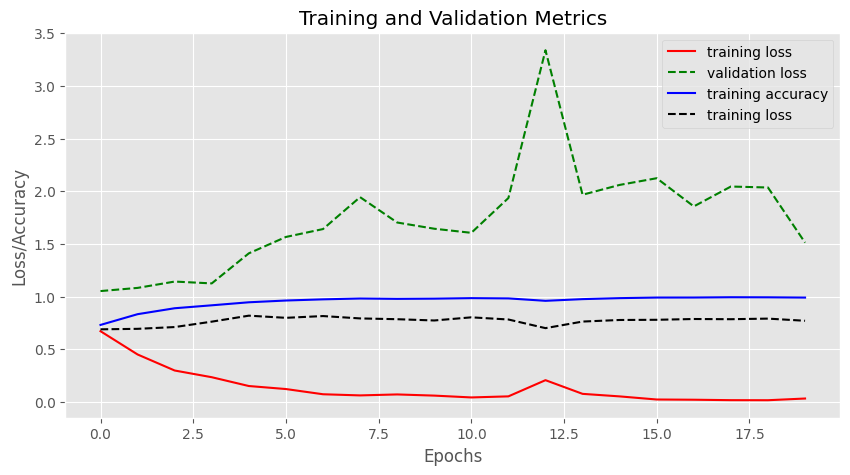

In [20]:
#plot error and accuracy
h = model_history.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

plt.plot(h['loss'], c = 'red', label = 'training loss')
plt.plot(h['val_loss'], c = 'g', label = 'validation loss', linestyle = '--')

plt.plot(h['accuracy'], c = 'b', label = 'training accuracy')
plt.plot(h['val_accuracy'], c = 'k', label = 'training loss', linestyle = '--')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training and Validation Metrics')
plt.show()

## **9- Evaluation**

In [21]:
cnn_model.evaluate(test_data)

108/108 [==============================] - 6s 59ms/step - loss: 1.5116 - accuracy: 0.7696


[1.5116323232650757, 0.7695895433425903]

In [22]:
cnn_model.evaluate(train_data)

394/394 [==============================] - 23s 58ms/step - loss: 0.0501 - accuracy: 0.9898


[0.05007699131965637, 0.9898451566696167]

## **10- predict new image**

In [23]:
testing_image = '/kaggle/input/continual-learning-of-covid19/COVID_CTandXRAY_11_dataset_5011_CL_Benchmark/test/X-Ray MERS/MERS (1).png'

In [24]:
class_map = dict([v,k] for k,v in train_data.class_indices.items())
class_map

{0: 'CT Normal',
 1: 'CT Omicron and Delta Variant',
 2: 'CT Other Pneumonia',
 3: 'CT Wildtype SARS-CoV-2',
 4: 'X-Ray Bacterial Pneumonia',
 5: 'X-Ray MERS',
 6: 'X-Ray Normal',
 7: 'X-Ray Omicron and Delta Variant',
 8: 'X-Ray Other Viral Pneumonia',
 9: 'X-Ray SARS',
 10: 'X-Ray Wildtype SARS-CoV-2'}

In [28]:
# testing image
def predictions(test_image_path, actual_label):

    #load and preprocessing image
    test_img = image.load_img(test_image_path, target_size = (512,512))
    test_img_arr = image.img_to_array(test_img)/ 255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1] , test_img_arr.shape[2]))

    # prediction
    predicted_label = np.argmax(cnn_model.predict(test_img_input))
    predicted_img = class_map[predicted_label]


    plt.figure(figsize = (4,4))
    plt.imshow(test_img_arr)
    plt.title("predicted label: {}, actual label : {}".format (predicted_img, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 435ms/step


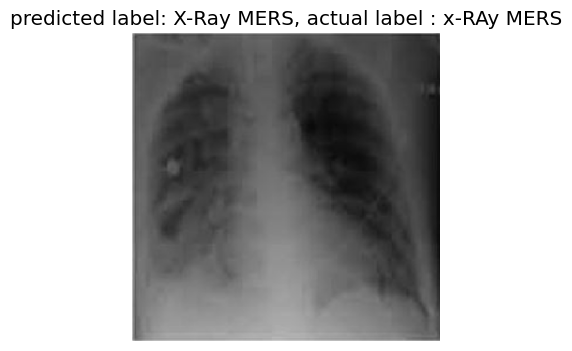

In [29]:
predictions(testing_image, actual_label= 'x-RAy MERS')

In [30]:
#save model
cnn_model.save('covid_19_model2.h5')